# Wine Classification Using Neural Networks with TensorFlow

In [31]:
# Import pandas for data handling and analysis
import pandas as pd

# Import Wine dataset from scikit-learn
from sklearn.datasets import load_wine

In [32]:
# Load the Wine dataset
data = load_wine()

# Input features (independent variables)
X = data.data

# Target labels (dependent variable)
y = data.target

In [33]:
# Print the shape of the feature matrix X
# X.shape returns (number_of_samples, number_of_features)
print("Shape of feature matrix X:", X.shape)

# Print the shape of the target vector y
# y.shape returns (number_of_samples,)
print("Shape of target vector y:", y.shape)

# Print a blank line and heading for better readability
print("\nFeature names:")

# Display the names of all input features
# These represent chemical properties of wine
print(data.feature_names)

# Print a blank line and heading for target classes
print("\nTarget classes:")

# Display the class labels of wine
# Each class represents a different type of wine
print(data.target_names)


Shape of feature matrix X: (178, 13)
Shape of target vector y: (178,)

Feature names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target classes:
['class_0' 'class_1' 'class_2']


**Observations**

* The dataset contains 178 wine samples.

* Each wine sample is described using 13 chemical features.

* The target variable contains 3 classes, indicating a multi-class classification problem.

* All features are numerical, which is suitable for Neural Networks.

* Since feature scales differ, normalization is required before training.

* The dataset is clean and has no missing values.  

In [34]:
# Create a Pandas DataFrame from the feature matrix X
# Each column is named using the feature names from the dataset
df = pd.DataFrame(X, columns=data.feature_names)

# Add the target labels as a new column named 'Target'
# This helps in linking input features with their corresponding class
df['Target'] = y

# Print a message for clarity
print("\nFirst 10 rows of the dataset:")

# Display the first 10 rows of the DataFrame
# head(10) shows a sample of the dataset for inspection
print(df.head(10))



First 10 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28       

**Observations**

* The dataset is successfully converted into a structured tabular format.

* All 13 features are present with meaningful column names.

* The Target column correctly represents wine classes (0, 1, 2).

* Feature values are in different ranges, confirming the need for feature scaling.

* No missing or null values are observed in the displayed rows.

In [35]:
# Import NumPy for numerical operations and array handling
import numpy as np

# Import Matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import Seaborn for advanced and attractive statistical visualizations
import seaborn as sns

# Import StandardScaler to normalize feature values
# Import OneHotEncoder to convert categorical labels into encoded format (if needed)
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import train_test_split to divide dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import Keras modules to build Neural Network models
from tensorflow.keras import models, layers

# Import evaluation metrics for model performance analysis
from sklearn.metrics import confusion_matrix, classification_report


In [36]:
# Create an object of StandardScaler
# This scaler standardizes features by removing the mean
# and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler on the feature data X and transform it
# fit() → computes mean and standard deviation
# transform() → scales the data
# fit_transform() → performs both steps together
X_scaled = scaler.fit_transform(X)


**Observations**

* All input features are now on a common scale.

* Large-magnitude features no longer dominate smaller ones.

* The model will train faster and more efficiently.

* Feature scaling improves overall model performance

In [37]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

**Observation**

* X_scaled is the standardized feature matrix where all features are scaled to have zero mean and unit variance.

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

* Observation

* The target variable y contains class labels for 178 wine samples, enabling supervised multi-class classification.

In [39]:
y.reshape(-1, 1)
# Reshapes y into a 2D column vector (required for some ML models)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

**Observation**

* y.reshape(-1,1) converts the target array into a 2-D column vector, which is useful for encoding and matrix-based operations.

In [40]:
# Create a OneHotEncoder object
# sparse_output=False ensures the output is a dense NumPy array
# (Required for scikit-learn version 1.2 and above)
encoder = OneHotEncoder(sparse_output=False)

# Reshape y into a 2D column vector and apply one-hot encoding
# fit()  -> learns unique class labels
# transform() -> converts labels into one-hot encoded format
# fit_transform() -> performs both steps together
y_encoded = encoder.fit_transform(y.reshape(-1, 1))


In [41]:
encoder

OneHotEncoder(sparse_output=False)

In [42]:
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

**Observation**

* The target labels are converted into one-hot encoded format, enabling effective multi-class classification using a neural network.

In [43]:
# Split the scaled feature matrix and encoded target labels
# into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(

    X_scaled,        # Input features (after scaling)
    y_encoded,       # One-hot encoded target labels

    test_size=0.2,   # 20% data for testing, 80% for training

    random_state=42, # Ensures reproducibility of results

    shuffle=True     # Randomly shuffles data before splitting
)

**Observation**

 * The dataset is split into training and testing sets, allowing the neural network to learn from training data and be evaluated on unseen test data.

In [44]:
X_train.shape[1]
# Gives the number of input features in the training dataset

13

In [45]:
# Create a Sequential neural network model
# Sequential means layers are stacked one after another
model = models.Sequential([

    # First hidden layer (also acts as input layer)
    # 32 neurons, ReLU activation
    # input_shape specifies number of input features (13)
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),

    # Second hidden layer
    # 16 neurons, ReLU activation
    layers.Dense(16, activation='relu'),

    # Output layer
    # 3 neurons -> one for each wine class
    # Softmax converts outputs into class probabilities
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Observation**

* A multi-layer feedforward neural network with ReLU hidden layers and softmax output is constructed for multi-class wine classification.

In [46]:
# Compile the neural network model
# optimizer='adam' adjusts weights efficiently during training
# loss='categorical_crossentropy' is used for multi-class classification
# metrics=['accuracy'] measures how well the model performs
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [47]:
# Train (fit) the neural network model on training data
history = model.fit(

    X_train,            # Training input features
    y_train,            # Training target labels (one-hot encoded)

    epochs=50,          # Number of times the model sees the full training dataset

    batch_size=16,      # Number of samples processed before updating weights

    validation_split=0.2,  # 20% of training data used for validation

    verbose=0           # Suppresses training output (clean console)
)

In [48]:
# Predict class probabilities for the test data
# Output will be probability values for each class
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities into class labels
# argmax selects the index of the highest probability
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded true labels back to class labels
y_true = np.argmax(y_test, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


**Observations**

* The model predicts probability distributions for each test sample.

* Predicted class labels are obtained by selecting the maximum probability.

* True labels are converted back from one-hot encoding for fair evaluation.

* This step prepares data for performance evaluation metrics.

In [49]:
y_pred_probs

array([[9.77015555e-01, 1.25323804e-02, 1.04521299e-02],
       [9.57273662e-01, 1.69008970e-02, 2.58254502e-02],
       [8.85364320e-03, 1.20695299e-02, 9.79076803e-01],
       [9.89123702e-01, 8.80689174e-03, 2.06941948e-03],
       [5.66034694e-04, 9.98937309e-01, 4.96745226e-04],
       [9.95376766e-01, 2.78994627e-03, 1.83335762e-03],
       [9.27748188e-05, 9.99781847e-01, 1.25350256e-04],
       [4.20792028e-03, 3.69825657e-03, 9.92093801e-01],
       [1.88561287e-02, 9.80166316e-01, 9.77687654e-04],
       [2.08194274e-02, 2.41017509e-02, 9.55078781e-01],
       [8.79079759e-01, 1.09126300e-01, 1.17939627e-02],
       [1.32134696e-02, 1.24785369e-02, 9.74308074e-01],
       [6.26155734e-01, 2.70446181e-01, 1.03398010e-01],
       [2.55649269e-04, 9.86610830e-01, 1.31335184e-02],
       [9.97281611e-01, 1.74521748e-03, 9.73054615e-04],
       [4.22440731e-04, 9.99209940e-01, 3.67669563e-04],
       [1.37458221e-04, 9.99628603e-01, 2.33885454e-04],
       [7.22578188e-05, 9.99794

* The neural network outputs probability distributions for each wine class, indicating the confidence of predictions.

In [50]:
# Create the confusion matrix
# y_true -> actual class labels
# y_pred -> predicted class labels
cm = confusion_matrix(y_true, y_pred)

In [51]:
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]])

* The confusion matrix shows that most predictions lie on the diagonal, indicating good classification performance with minimal misclassifications.

In [52]:
# Generate a detailed classification report
# y_true -> actual class labels
# y_pred -> predicted class labels
# target_names -> names of the wine classes
cr = classification_report(
    y_true,
    y_pred,
    target_names=data.target_names
)

In [53]:
# Print the classification report
# Displays precision, recall, F1-score, and support for each class
print(cr)

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



**Observation**

* The classification report indicates that the neural network achieves high precision, recall, and F1-scores across all wine classes.

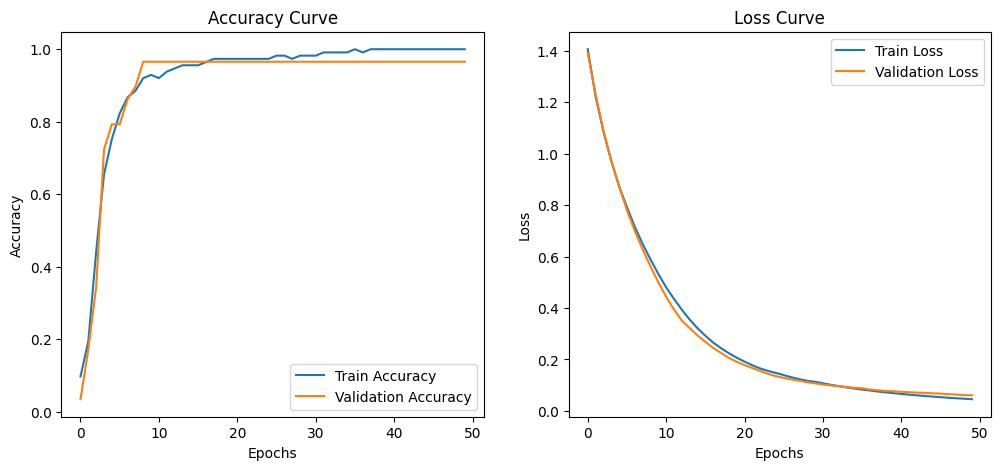

In [54]:
# Create a figure with a specific size
# This controls the overall size of the plots
plt.figure(figsize=(12,5))

# Accuracy Curve
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot

# Plot training accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')

# Plot validation accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add title and axis labels
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Show legend to distinguish curves
plt.legend()

# Loss Curve

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Plot training loss over epochs
plt.plot(history.history['loss'], label='Train Loss')

# Plot validation loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add title and axis labels
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show legend
plt.legend()

# Display the plots
plt.show()


**Observations**

* Training and validation accuracy increase steadily over epochs.

* Loss values decrease consistently, indicating proper learning.

* Small gap between training and validation curves suggests good generalization.

* No significant overfitting is observed.